## PART 1: Data Processing

#### Load data

In [91]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [93]:
mrkt_df = pd.read_csv('/Users/anish/OneDrive - Dickinson College/Documents/GitHub/DATA300-Group-Project/marketing_campaign.csv', sep=',')

In [95]:
#mrkt_df = pd.read_csv('/Users/tu/Library/CloudStorage/OneDrive-DickinsonCollege/Junior/SPRING25/DATA300/Group-Project/marketing_campaign.csv', sep=',')

In [96]:
mrkt_df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

#### Cleaning the dataset

In [100]:
print("Dimension of the data: ", mrkt_df.shape)
no_of_rows = mrkt_df.shape[0]
no_of_columns = mrkt_df.shape[1]
print(f'No. of Rows: {no_of_rows}')
print(f'No. of Columns: {no_of_columns}')

Dimension of the data:  (2240, 29)
No. of Rows: 2240
No. of Columns: 29


In [101]:
#check income column
mrkt_df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [103]:
# Write a function to count NA cells in income column
def NaCount(dataFrame, columnName):
   count = dataFrame[columnName].isna().sum()
   return count
count = NaCount(mrkt_df, 'Income')
print(f'Number of missing values in Income Column: {count}')

Number of missing values in Income Column: 24


In [105]:
#dropping the missing value rows
mrkt_df = mrkt_df.dropna(subset=['Income'])

#### Normalizing income variable

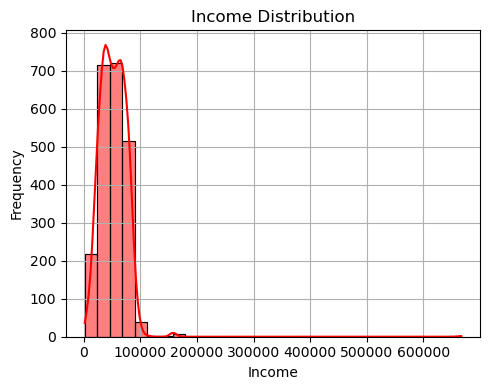

In [109]:
#check distribution of income variable
plt.figure(figsize=(5, 4))
sns.histplot(mrkt_df['Income'], kde=True, bins=30, color='red', edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

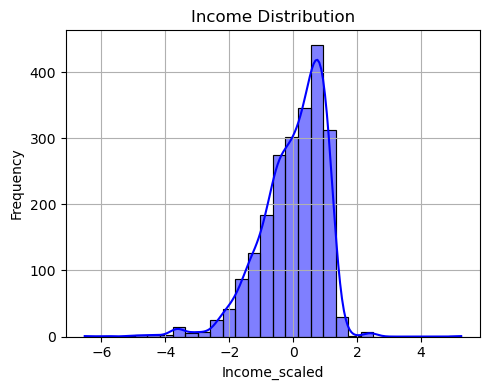

In [110]:
#since histogram appears right-skewed, we use log transformation to normalize the income
mrkt_df['Income_log'] = np.log1p(mrkt_df['Income'])
#standardize
scaler = StandardScaler()
mrkt_df['Income_scaled'] = scaler.fit_transform(mrkt_df[['Income_log']])

#check distribution of income variable
plt.figure(figsize=(5, 4))
sns.histplot(mrkt_df['Income_scaled'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income_scaled')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Disproportion in the number of observations that response Yes and No shows the need to apply resampling to reduce the imbalance result.

In [112]:
#Convert Dt_Customer to date column
mrkt_df['Dt_Customer'] = pd.to_datetime(mrkt_df['Dt_Customer'], format="%d-%m-%Y")

In [113]:
mrkt_df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             1   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0                0             0             0         0              3   
1                0             0             0         0              3   
2                0             0             0         0              3   
3                0             0             0         0              3   
4                0             0             0         0              3   
...            ...           ...           ...       ...            ...   
2235             0             0             0         0              3   
2236             0             1             0         0              3   
2237             0             0             0         0              3   
2238             0             0             0         0              3   
2239             0             0             0         0              3   

      Z_Revenue  Response  Income_log  Income_scaled  
0            11         1   10.970592       0.428623  
1            11         0   10.743869      -0.019686  
2            11         0   11.179046       0.840808  
3            11         0   10.190432      -1.114019  
4            11         0   10.973254       0.433888  
...         ...       ...         ...            ...  
2235         11         0   11.022295       0.530857  
2236         11         0   11.066873       0.619003  
2237         11         0   10.950491       0.388876  
2238         11         0   11.145421       0.774319  
2239         11         1   10.875591       0.240775  

[2216 rows x 31 columns]

#### Only Numerical Dataset

In [115]:
num_df = mrkt_df[['Year_Birth', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Income_scaled','Response']]
num_df

Year_Birth  Recency  MntWines  MntFruits  MntMeatProducts  \
0           1957       58       635         88              546   
1           1954       38        11          1                6   
2           1965       26       426         49              127   
3           1984       26        11          4               20   
4           1981       94       173         43              118   
...          ...      ...       ...        ...              ...   
2235        1967       46       709         43              182   
2236        1946       56       406          0               30   
2237        1981       91       908         48              217   
2238        1956        8       428         30              214   
2239        1954       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  Income_scaled  Response  
0                     7       0.428623         1  
1                     5      -0.019686         0  
2                     4       0.840808         0  
3                     6      -1.114019         0  
4                     5       0.433888         0  
...                 ...            ...       ...  
2235                  5       0.530857         0  
2236                  7       0.619003         0  
2237                  6       0.388876         0  
2238                  3       0.774319         0  
2239                  7       0.240775         1  

[2216 rows x 15 columns]

#### Encoding categorical variables

In [122]:
#list of categorical values
category_cols = mrkt_df.select_dtypes(include='object').columns
print("Categorical columns:\n", category_cols)

Categorical columns:
 Index(['Education', 'Marital_Status'], dtype='object')


In [124]:
#Label Encoding: Education (since its ordinal)
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
mrkt_df['Education_encoded'] = mrkt_df['Education'].astype(pd.CategoricalDtype(categories=education_order, ordered=True)).cat.codes

In [126]:
#Marital Status: Group some strange categories together
mrkt_df['Marital_Status_Clean'] = mrkt_df['Marital_Status'].replace({
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Other',
    'Widow': 'Other'
})

In [128]:
#One-Hot Encoding for marital status
marital_dummies = pd.get_dummies(mrkt_df['Marital_Status_Clean'], prefix='Marital', dtype=int)
mrkt_df = pd.concat([mrkt_df, marital_dummies], axis=1)


In [130]:
mrkt_df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Response  Income_log  \
0            0  2012-09-04       58       635  ...         1   10.970592   
1            1  2014-03-08       38        11  ...         0   10.743869   
2            0  2013-08-21       26       426  ...         0   11.179046   
3            0  2014-02-10       26        11  ...         0   10.190432   
4            0  2014-01-19       94       173  ...         0   10.973254   
...        ...         ...      ...       ...  ...       ...         ...   
2235         1  2013-06-13       46       709  ...         0   11.022295   
2236         1  2014-06-10       56       406  ...         0   11.066873   
2237         0  2014-01-25       91       908  ...         0   10.950491   
2238         1  2014-01-24        8       428  ...         0   11.145421   
2239         1  2012-10-15       40        84  ...         1   10.875591   

      Income_scaled  Education_encoded  Marital_Status_Clean  \
0          0.428623                  2                Single   
1         -0.019686                  2                Single   
2          0.840808                  2              Together   
3         -1.114019                  2              Together   
4          0.433888                  4               Married   
...             ...                ...                   ...   
2235       0.530857                  2               Married   
2236       0.619003                  4              Together   
2237       0.388876                  2              Divorced   
2238       0.774319                  3              Together   
2239       0.240775                  4               Married   

      Marital_Divorced  Marital_Married  Marital_Other  Marital_Single  \
0                    0                0              0               1   
1                    0                0              0               1   
2                    0                0              0               0   
3                    0                0              0               0   
4                    0                1              0               0   
...                ...              ...            ...             ...   
2235                 0                1              0               0   
2236                 0                0              0               0   
2237                 1                0              0               0   
2238                 0                0              0               0   
2239                 0                1              0               0   

      Marital_Together  
0                    0  
1                    0  
2                    1  
3                    1  
4                    0  
...                ...  
2235                 0  
2236                 1  
2237                 0  
2238                 1  
2239                 0  

[2216 rows x 38 columns]

In [132]:
#Numerical columns only
category = mrkt_df.drop(['Education', 'Marital_Status', 'Income','Dt_Customer','Income_log','Marital_Status_Clean','Z_CostContact',
                         'Z_Revenue','Year_Birth', 'Recency', 'MntWines',
                         'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                         'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                         'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                         'Income_scaled', 'ID'], axis=1)
category

Kidhome  Teenhome  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0           0         0             0             0             0   
1           1         1             0             0             0   
2           0         0             0             0             0   
3           1         0             0             0             0   
4           1         0             0             0             0   
...       ...       ...           ...           ...           ...   
2235        0         1             0             0             0   
2236        2         1             0             0             0   
2237        0         0             0             1             0   
2238        0         1             0             0             0   
2239        1         1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Education_encoded  \
0                0             0         0         1                  2   
1                0             0         0         0                  2   
2                0             0         0         0                  2   
3                0             0         0         0                  2   
4                0             0         0         0                  4   
...            ...           ...       ...       ...                ...   
2235             0             0         0         0                  2   
2236             1             0         0         0                  4   
2237             0             0         0         0                  2   
2238             0             0         0         0                  3   
2239             0             0         0         1                  4   

      Marital_Divorced  Marital_Married  Marital_Other  Marital_Single  \
0                    0                0              0               1   
1                    0                0              0               1   
2                    0                0              0               0   
3                    0                0              0               0   
4                    0                1              0               0   
...                ...              ...            ...             ...   
2235                 0                1              0               0   
2236                 0                0              0               0   
2237                 1                0              0               0   
2238                 0                0              0               0   
2239                 0                1              0               0   

      Marital_Together  
0                    0  
1                    0  
2                    1  
3                    1  
4                    0  
...                ...  
2235                 0  
2236                 1  
2237                 0  
2238                 1  
2239                 0  

[2216 rows x 15 columns]

## Part 2: Feature Selection

In this project, we want our features to be our customers' information (income, purchasing history, etc).

#### Check for correlation numerical

In [137]:
most_correlated_num = num_df.corr().abs()['Response'].sort_values(ascending=False)
print("Most Correlated Features:\n")
print(most_correlated_num)


Most Correlated Features:

Response               1.000000
MntWines               0.246299
MntMeatProducts        0.237746
NumCatalogPurchases    0.219914
Recency                0.199766
NumWebPurchases        0.151431
MntGoldProds           0.140332
Income_scaled          0.127392
MntFruits              0.122443
MntSweetProducts       0.116170
MntFishProducts        0.108145
NumStorePurchases      0.036241
Year_Birth             0.023692
NumDealsPurchases      0.003451
NumWebVisitsMonth      0.002209
Name: Response, dtype: float64


#### Correlation for category 

In [140]:
most_correlated_cat = category.corr().abs()['Response'].sort_values(ascending=False)
print("Most Correlated Features:\n")
print(most_correlated_cat)

Most Correlated Features:

Response             1.000000
AcceptedCmp5         0.323374
AcceptedCmp1         0.297345
AcceptedCmp3         0.254005
AcceptedCmp4         0.180205
AcceptedCmp2         0.169294
Teenhome             0.153901
Marital_Single       0.112148
Education_encoded    0.099150
Marital_Married      0.079821
Kidhome              0.077909
Marital_Together     0.075293
Marital_Divorced     0.054189
Marital_Other        0.049881
Complain             0.002029
Name: Response, dtype: float64


In [142]:
# combine categorical and numerical dataset
category

Kidhome  Teenhome  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0           0         0             0             0             0   
1           1         1             0             0             0   
2           0         0             0             0             0   
3           1         0             0             0             0   
4           1         0             0             0             0   
...       ...       ...           ...           ...           ...   
2235        0         1             0             0             0   
2236        2         1             0             0             0   
2237        0         0             0             1             0   
2238        0         1             0             0             0   
2239        1         1             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Education_encoded  \
0                0             0         0         1                  2   
1                0             0         0         0                  2   
2                0             0         0         0                  2   
3                0             0         0         0                  2   
4                0             0         0         0                  4   
...            ...           ...       ...       ...                ...   
2235             0             0         0         0                  2   
2236             1             0         0         0                  4   
2237             0             0         0         0                  2   
2238             0             0         0         0                  3   
2239             0             0         0         1                  4   

      Marital_Divorced  Marital_Married  Marital_Other  Marital_Single  \
0                    0                0              0               1   
1                    0                0              0               1   
2                    0                0              0               0   
3                    0                0              0               0   
4                    0                1              0               0   
...                ...              ...            ...             ...   
2235                 0                1              0               0   
2236                 0                0              0               0   
2237                 1                0              0               0   
2238                 0                0              0               0   
2239                 0                1              0               0   

      Marital_Together  
0                    0  
1                    0  
2                    1  
3                    1  
4                    0  
...                ...  
2235                 0  
2236                 1  
2237                 0  
2238                 1  
2239                 0  

[2216 rows x 15 columns]

In [144]:
mrkt_df = mrkt_df.drop(['Marital_Status', 'Education', 'Dt_Customer', 'Marital_Status_Clean'], axis = 1)

In [146]:
#Shuffled dataset
shuffle_df = mrkt_df.sample(frac=1,random_state=42).reset_index(drop=True)
shuffle_df.head()

ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  3635        1962  52597.0        0         1       69       492          0   
1  3726        1986  34320.0        1         0       66         4          1   
2  9080        1972  38578.0        1         1        2        38          4   
3  8746        1989  75433.0        1         0       28       800          0   
4  8079        1982  22448.0        1         0       86         3          1   

   MntMeatProducts  MntFishProducts  ...  Z_Revenue  Response  Income_log  \
0               37                7  ...         11         0   10.870433   
1                9                3  ...         11         0   10.443513   
2               22                3  ...         11         0   10.560463   
3              297                0  ...         11         0   11.231013   
4                8               23  ...         11         0   10.019001   

   Income_scaled  Education_encoded  Marital_Divorced  Marital_Married  \
0       0.230575                  4                 0                0   
1      -0.613592                  4                 0                0   
2      -0.382341                  4                 0                0   
3       0.943565                  2                 0                1   
4      -1.452996                  2                 0                1   

   Marital_Other  Marital_Single  Marital_Together  
0              0               1                 0  
1              0               0                 1  
2              0               1                 0  
3              0               0                 0  
4              0               0                 0  

[5 rows x 34 columns]

In [148]:
shuffle_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Income_log', 'Income_scaled',
       'Education_encoded', 'Marital_Divorced', 'Marital_Married',
       'Marital_Other', 'Marital_Single', 'Marital_Together'],
      dtype='object')

#### Assign features and target variable

In [151]:
X = shuffle_df.drop(columns=['ID','Response', 'NumStorePurchases', 'Year_Birth', 'NumDealsPurchases', 'NumWebVisitsMonth', "Complain", "Marital_Other", "Marital_Divorced"]).to_numpy()
y = shuffle_df['Response'].to_numpy().reshape(-1,1)

In [153]:
pd.DataFrame(X)

0    1    2     3       4     5      6     7     8     9   ...  \
0     52597.0  0.0  1.0  69.0   492.0   0.0   37.0   7.0   0.0  42.0  ...   
1     34320.0  1.0  0.0  66.0     4.0   1.0    9.0   3.0   0.0   0.0  ...   
2     38578.0  1.0  1.0   2.0    38.0   4.0   22.0   3.0   3.0   3.0  ...   
3     75433.0  1.0  0.0  28.0   800.0   0.0  297.0   0.0  34.0  57.0  ...   
4     22448.0  1.0  0.0  86.0     3.0   1.0    8.0  23.0   2.0  18.0  ...   
...       ...  ...  ...   ...     ...   ...    ...   ...   ...   ...  ...   
2211  35544.0  1.0  0.0  77.0    30.0   5.0   23.0   4.0   1.0   4.0  ...   
2212  65463.0  1.0  0.0  17.0   391.0  32.0   70.0  21.0  32.0  16.0  ...   
2213  33419.0  0.0  1.0  76.0    56.0   0.0   12.0   0.0   0.0  18.0  ...   
2214  81051.0  0.0  0.0  43.0  1142.0  29.0  249.0  38.0  29.0  14.0  ...   
2215  42395.0  1.0  1.0  35.0    48.0  13.0   57.0  24.0  15.0  25.0  ...   

       15   16   17    18         19        20   21   22   23   24  
0     0.0  0.0  3.0  11.0  10.870433  0.230575  4.0  0.0  1.0  0.0  
1     0.0  0.0  3.0  11.0  10.443513 -0.613592  4.0  0.0  0.0  1.0  
2     0.0  0.0  3.0  11.0  10.560463 -0.382341  4.0  0.0  1.0  0.0  
3     1.0  0.0  3.0  11.0  11.231013  0.943565  2.0  1.0  0.0  0.0  
4     0.0  0.0  3.0  11.0  10.019001 -1.452996  2.0  1.0  0.0  0.0  
...   ...  ...  ...   ...        ...       ...  ...  ...  ...  ...  
2211  0.0  0.0  3.0  11.0  10.478555 -0.544302  3.0  0.0  1.0  0.0  
2212  0.0  0.0  3.0  11.0  11.089256  0.663262  1.0  1.0  0.0  0.0  
2213  0.0  0.0  3.0  11.0  10.416910 -0.666195  4.0  0.0  1.0  0.0  
2214  0.0  0.0  3.0  11.0  11.302846  1.085603  4.0  1.0  0.0  0.0  
2215  0.0  0.0  3.0  11.0  10.654809 -0.195787  1.0  0.0  1.0  0.0  

[2216 rows x 25 columns]

## Part 3: Modelling

### Splitting dataset into training set

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Get feature column names to reattach after split
feature_cols = shuffle_df.drop(columns=[
   'ID', 'Response', 'NumStorePurchases', 'Year_Birth', 'NumDealsPurchases','NumWebVisitsMonth', "Complain", "Marital_Other", "Marital_Divorced"]).columns

train_df = pd.DataFrame(X_train, columns=feature_cols)
train_df['Response'] = y_train

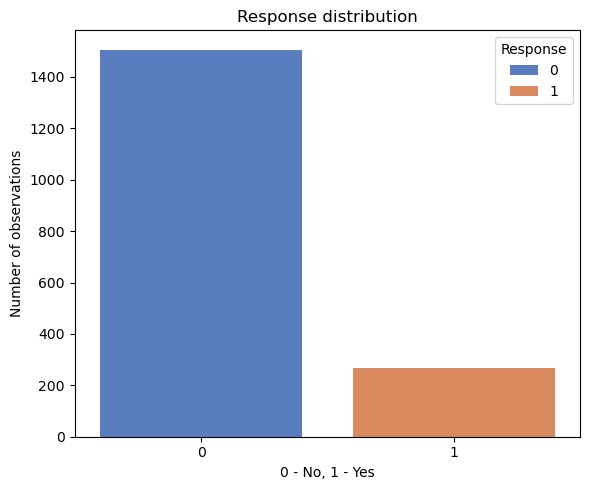

In [159]:
train_df.groupby('Response')

plt.figure(figsize=(6, 5))
sns.countplot(data=train_df, x='Response',  hue='Response', palette='muted')
plt.title('Response distribution')
plt.ylabel('Number of observations')
plt.xlabel('0 - No, 1 - Yes')
plt.tight_layout()
plt.show()

Bar graph shows imbalance in distribution of response variables therefore resampling is required. Method used: Oversampling

In [162]:
#majority and minority classes
majority_class = train_df[train_df['Response'] == 0]
minority_class = train_df[train_df['Response'] == 1]

#Oversample the minority class
minority_upsampled = resample(
    minority_class,
    replace=True,              
    n_samples=len(majority_class), #Match number of majority class
    random_state=42
)
#Combine back into a balanced training set 
train_upsampled = pd.concat([majority_class, minority_upsampled])
train_upsampled = train_upsampled.sample(frac=1, random_state=42)  # Shuffle

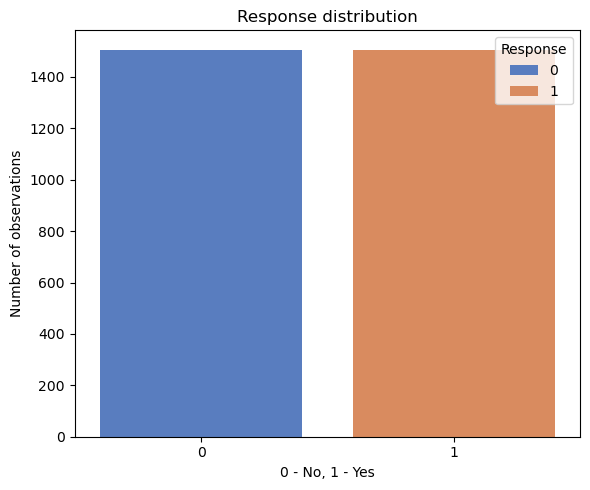

In [164]:
train_upsampled.groupby('Response')

plt.figure(figsize=(6, 5))
sns.countplot(data=train_upsampled, x='Response',  hue='Response', palette='muted')
plt.title('Response distribution')
plt.ylabel('Number of observations')
plt.xlabel('0 - No, 1 - Yes')
plt.tight_layout()
plt.show()

In [165]:
#Split X and y for model training
X_train_balanced = train_upsampled.drop(columns=['Response'])
y_train_balanced = train_upsampled['Response'].to_numpy().reshape(-1, 1)

## Models

#### Load necessary packages

#### - Logistic Regression

In [172]:
pd.DataFrame(X_train_balanced)

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
481    69476.0      0.0       0.0      3.0     260.0       86.0   
170    55517.0      1.0       1.0     53.0     483.0        0.0   
478    34242.0      0.0       1.0     25.0       8.0        2.0   
64     63342.0      0.0       1.0     48.0     918.0       21.0   
1634   44964.0      1.0       1.0     35.0      19.0        1.0   
...        ...      ...       ...      ...       ...        ...   
931   105471.0      0.0       0.0     36.0    1009.0      181.0   
1272   34596.0      1.0       0.0     48.0      14.0        0.0   
1312   36138.0      1.0       1.0     48.0     130.0        0.0   
1514   66000.0      0.0       0.0     36.0     244.0       51.0   
1006   36975.0      1.0       0.0     50.0      10.0        6.0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
481             559.0             63.0               9.0          67.0  ...   
170             108.0              0.0               6.0          36.0  ...   
478               4.0              0.0               0.0           1.0  ...   
64              118.0             13.0              10.0          21.0  ...   
1634             17.0              2.0               0.0           2.0  ...   
...               ...              ...               ...           ...  ...   
931             104.0            202.0              21.0         207.0  ...   
1272              2.0              0.0               0.0           7.0  ...   
1312             16.0              0.0               0.0           5.0  ...   
1514            270.0            101.0               0.0          45.0  ...   
1006             11.0              0.0               4.0           2.0  ...   

      AcceptedCmp1  AcceptedCmp2  Z_CostContact  Z_Revenue  Income_log  \
481            0.0           0.0            3.0       11.0   11.148751   
170            0.0           0.0            3.0       11.0   10.924463   
478            0.0           0.0            3.0       11.0   10.441237   
64             0.0           0.0            3.0       11.0   11.056320   
1634           0.0           0.0            3.0       11.0   10.713640   
...            ...           ...            ...        ...         ...   
931            1.0           0.0            3.0       11.0   11.566201   
1272           0.0           0.0            3.0       11.0   10.451522   
1312           0.0           0.0            3.0       11.0   10.495128   
1514           0.0           0.0            3.0       11.0   11.097425   
1006           0.0           0.0            3.0       11.0   10.518024   

      Income_scaled  Education_encoded  Marital_Married  Marital_Single  \
481        0.780904                4.0              0.0             0.0   
170        0.337410                4.0              1.0             0.0   
478       -0.618091                3.0              1.0             0.0   
64         0.598136                4.0              0.0             0.0   
1634      -0.079459                2.0              0.0             0.0   
...             ...                ...              ...             ...   
931        1.606345                2.0              0.0             0.0   
1272      -0.597755                4.0              1.0             0.0   
1312      -0.511531                3.0              1.0             0.0   
1514       0.679416                3.0              0.0             0.0   
1006      -0.466257                1.0              0.0             1.0   

      Marital_Together  
481                1.0  
170                0.0  
478                0.0  
64                 1.0  
1634               1.0  
...                ...  
931                1.0  
1272               0.0  
1312               0.0  
1514               1.0  
1006               0.0  

[3012 rows x 25 columns]

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, classification_report,confusion_matrix

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Train logreg on balanced data
logreg = LogisticRegression(max_iter=2000, random_state=42)  # Increase max_iter to ensure convergence
logreg.fit(X_train_balanced, y_train_balanced.ravel())

# Predictions
y_pred_log = logreg.predict(X_test)

# Model Evaluation

# confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_log))



Confusion matrix
[[285  92]
 [ 18  49]]


C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [183]:
# accuracy, precision, recall, f1
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       377
           1       0.35      0.73      0.47        67

    accuracy                           0.75       444
   macro avg       0.64      0.74      0.65       444
weighted avg       0.85      0.75      0.78       444



#### - Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train_balanced, y_train_balanced)

C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [85]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.8671171171171171
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       377
           1       0.59      0.40      0.48        67

    accuracy                           0.87       444
   macro avg       0.74      0.68      0.70       444
weighted avg       0.85      0.87      0.86       444



C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [87]:
# Feature importances
X_df = pd.DataFrame(X)  # Assuming X is the full feature set used in training
importances = rf.feature_importances_

feature_importance = pd.DataFrame({
    "features": X_df.columns,
    "importance": importances * 100
})

# Sort by importance descending
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
print(feature_importance)


    features  importance
3          3   12.617567
6          6    7.862922
9          9    7.656416
4          4    7.557016
20        20    6.449185
19        19    6.091784
0          0    5.937463
12        12    5.845892
11        11    4.809248
8          8    4.733466
5          5    4.501497
7          7    4.252303
15        15    3.867716
10        10    3.636842
14        14    3.034409
21        21    2.565982
2          2    1.831334
23        23    1.322846
1          1    1.288239
13        13    1.214834
24        24    1.199843
22        22    1.174888
16        16    0.548311
18        18    0.000000
17        17    0.000000


#### - XGBoost

## Part 4: Evaluation

#### Load necessary packages

## Part 5: Hyperparameter Tuning

#### Load necessary packages

## Part 6: Interpretation